In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Load the data
transactions_df = pd.read_parquet('./simulated-data-transformed/transactions.parquet')

In [251]:
transactions_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENERIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT7DAY_WINDOW,CUSTOMER_ID_NB_TX30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
0,0,2024-08-16 00:00:31,596,3156,57.16,31,0,0,0,0,...,1.0,57.160000,1.0,57.160000,0.0,0.0,0.0,0.0,0.0,0.000000
1,1,2024-08-16 00:02:10,4961,3412,81.51,130,0,0,0,0,...,1.0,81.510000,1.0,81.510000,0.0,0.0,0.0,0.0,0.0,0.000000
2,2,2024-08-16 00:07:56,2,1365,146.00,476,0,0,0,0,...,1.0,146.000000,1.0,146.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,3,2024-08-16 00:09:29,4128,8737,64.49,569,0,0,0,0,...,1.0,64.490000,1.0,64.490000,0.0,0.0,0.0,0.0,0.0,0.000000
4,4,2024-08-16 00:10:34,927,9906,50.99,634,0,0,0,0,...,1.0,50.990000,1.0,50.990000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610205,1610205,2025-01-30 23:55:00,1774,6994,21.45,14514900,167,0,0,0,...,13.0,11.818462,64.0,27.084219,0.0,0.0,8.0,0.0,32.0,0.000000
1610206,1610206,2025-01-30 23:55:17,4161,9595,23.42,14514917,167,0,0,0,...,23.0,20.338261,123.0,21.500650,0.0,0.0,9.0,0.0,29.0,0.000000
1610207,1610207,2025-01-30 23:56:14,3179,2,46.73,14514974,167,0,0,0,...,20.0,66.644500,68.0,70.123971,0.0,0.0,3.0,0.0,18.0,0.000000
1610208,1610208,2025-01-30 23:56:27,4399,3644,77.21,14514987,167,0,0,0,...,9.0,87.168889,46.0,87.769348,0.0,0.0,10.0,0.0,35.0,0.028571


DEFINING TRANING AND TEST SETS
- 2024-08-23 to 2024-08-30 will be the traning set
- 2024-09-06 to 2024-09-13 will be the test set
- One week of data will be sufficient
- Later, larger periods to evaluate how larger sets can affect the performance results

In [252]:
transactions_df = transactions_df[(transactions_df['TX_DATETIME'] >= '2024-08-23') & (transactions_df['TX_DATETIME'] <= '2024-09-14')]
transactions_df.head(5)


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENERIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT7DAY_WINDOW,CUSTOMER_ID_NB_TX30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
66976,66976,2024-08-23 00:03:47,1054,9984,64.93,605027,7,0,0,0,...,10.0,54.902000,10.0,54.902000,0.0,0.0,0.0,0.0,0.0,0.0
66977,66977,2024-08-23 00:04:57,2987,8506,2.00,605097,7,0,0,0,...,23.0,39.520435,23.0,39.520435,0.0,0.0,0.0,0.0,0.0,0.0
66978,66978,2024-08-23 00:08:25,1891,9374,21.34,605305,7,0,0,0,...,9.0,22.857778,9.0,22.857778,0.0,0.0,0.0,0.0,0.0,0.0
66979,66979,2024-08-23 00:11:00,754,2125,35.93,605460,7,0,0,0,...,11.0,67.399091,11.0,67.399091,0.0,0.0,0.0,0.0,0.0,0.0
66980,66980,2024-08-23 00:13:03,4475,1800,127.20,605583,7,0,0,0,...,18.0,78.337778,18.0,78.337778,0.0,0.0,0.0,0.0,0.0,0.0


In [253]:
transactions_df.tail(5)

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENERIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_NB_TX7DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT7DAY_WINDOW,CUSTOMER_ID_NB_TX30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW
278297,278297,2024-09-13 23:52:15,691,392,11.24,2505135,28,0,0,0,...,18.0,28.420000,61.0,29.011803,2.0,0.0,10.0,0.0,25.0,0.0
278298,278298,2024-09-13 23:52:29,4974,7931,125.06,2505149,28,0,0,0,...,25.0,87.709600,91.0,87.814396,1.0,0.0,8.0,0.0,18.0,0.0
278299,278299,2024-09-13 23:54:19,1469,712,226.61,2505259,28,1,1,0,...,18.0,94.086111,100.0,85.307400,2.0,0.0,9.0,0.0,25.0,0.0
278300,278300,2024-09-13 23:55:31,510,9154,49.76,2505331,28,0,0,0,...,23.0,54.491739,74.0,51.709459,0.0,0.0,6.0,0.0,19.0,0.0
278301,278301,2024-09-13 23:56:06,4990,5421,112.88,2505366,28,0,0,0,...,16.0,75.834375,56.0,80.360536,0.0,0.0,8.0,0.0,21.0,0.0


In [255]:
# Calculate the difference in days
transactions_df.loc[:, 'TX_TIME_DAYS_TEMP'] = (transactions_df['TX_DATETIME'] - transactions_df['TX_DATETIME'].min())

# Convert the difference to integer
transactions_df.loc[:, 'TX_TIME_DAYS_TEMP'] = (transactions_df['TX_TIME_DAYS_TEMP'] / np.timedelta64(1, 'D')).astype(int)

# Drop the original 'TX_TIME_DAYS' column
transactions_df = transactions_df.drop(columns=['TX_TIME_DAYS'])

# Rename the temporary column to 'TX_TIME_DAYS'
transactions_df = transactions_df.rename(columns={'TX_TIME_DAYS_TEMP': 'TX_TIME_DAYS'})

/var/folders/5c/rt3br2gn32703lgpxpmkc82c0000gn/T/ipykernel_21504/652357629.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0  0  0 ... 21 21 21]' has dtype incompatible with timedelta64[ns], please explicitly cast to a compatible dtype first.
  transactions_df.loc[:, 'TX_TIME_DAYS_TEMP'] = (transactions_df['TX_TIME_DAYS_TEMP'] / np.timedelta64(1, 'D')).astype(int)


In [256]:
transactions_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_FRAUD,TX_FRAUD_SCENERIO,TX_DURING_WEEKEND,TX_DURING_NIGHT,...,CUSTOMER_ID_AVG_AMOUNT7DAY_WINDOW,CUSTOMER_ID_NB_TX30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TX_TIME_DAYS
66976,66976,2024-08-23 00:03:47,1054,9984,64.93,605027,0,0,0,1,...,54.902000,10.0,54.902000,0.0,0.0,0.0,0.0,0.0,0.0,0
66977,66977,2024-08-23 00:04:57,2987,8506,2.00,605097,0,0,0,1,...,39.520435,23.0,39.520435,0.0,0.0,0.0,0.0,0.0,0.0,0
66978,66978,2024-08-23 00:08:25,1891,9374,21.34,605305,0,0,0,1,...,22.857778,9.0,22.857778,0.0,0.0,0.0,0.0,0.0,0.0,0
66979,66979,2024-08-23 00:11:00,754,2125,35.93,605460,0,0,0,1,...,67.399091,11.0,67.399091,0.0,0.0,0.0,0.0,0.0,0.0,0
66980,66980,2024-08-23 00:13:03,4475,1800,127.20,605583,0,0,0,1,...,78.337778,18.0,78.337778,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278297,278297,2024-09-13 23:52:15,691,392,11.24,2505135,0,0,0,0,...,28.420000,61.0,29.011803,2.0,0.0,10.0,0.0,25.0,0.0,21
278298,278298,2024-09-13 23:52:29,4974,7931,125.06,2505149,0,0,0,0,...,87.709600,91.0,87.814396,1.0,0.0,8.0,0.0,18.0,0.0,21
278299,278299,2024-09-13 23:54:19,1469,712,226.61,2505259,1,1,0,0,...,94.086111,100.0,85.307400,2.0,0.0,9.0,0.0,25.0,0.0,21
278300,278300,2024-09-13 23:55:31,510,9154,49.76,2505331,0,0,0,0,...,54.491739,74.0,51.709459,0.0,0.0,6.0,0.0,19.0,0.0,21


In [257]:
def get_tx_stats(transactions_df, start_date_df = '2024-08-22'):
    #Number of transactions per day
    nb_tx_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['CUSTOMER_ID'].count()
    #Number of fraudulent transactions per day
    nb_fraudulent_transactions_per_day=transactions_df.groupby(['TX_TIME_DAYS'])['TX_FRAUD'].sum()
    #Number of compromised cards per day
    nb_compromised_cards_per_day=transactions_df[transactions_df['TX_FRAUD']==1].groupby(['TX_TIME_DAYS']).CUSTOMER_ID.nunique()
    
    tx_stats=pd.DataFrame({"nb_tx_per_day":nb_tx_per_day,
                           "nb_fraudulent_transactions_per_day":nb_fraudulent_transactions_per_day,
                           "nb_compromised_cards_per_day":nb_compromised_cards_per_day})
    tx_stats = tx_stats.reset_index()
    
    start_date = datetime.datetime.strptime(start_date_df, "%Y-%m-%d")
    tx_date=start_date + tx_stats['TX_TIME_DAYS'].apply(datetime.timedelta)
    
    tx_stats['tx_date']=tx_date
    
    return tx_stats

tx_stats = get_tx_stats(transactions_df, start_date_df = '2024-08-23')
tx_stats

,TX_TIME_DAYS,nb_tx_per_day,nb_fraudulent_transactions_per_day,nb_compromised_cards_per_day,tx_date
0,0,9471,33,29,2024-08-23
1,1,9699,35,32,2024-08-24
2,2,9673,55,49,2024-08-25
3,3,9621,51,42,2024-08-26
4,4,9544,46,38,2024-08-27
5,5,9751,54,51,2024-08-28
6,6,9557,55,45,2024-08-29
7,7,9480,57,47,2024-08-30
8,8,9539,52,48,2024-08-31
9,9,9578,46,45,2024-09-01


2024-09-12 00:00:00


/var/folders/5c/rt3br2gn32703lgpxpmkc82c0000gn/T/ipykernel_21504/1096906684.py:52: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(tx_stats['tx_date'], tx_stats['nb_tx_per_day']/50, 'b', color=colors['nb_tx_per_day'], label = '# transactions per day (/50)')
/var/folders/5c/rt3br2gn32703lgpxpmkc82c0000gn/T/ipykernel_21504/1096906684.py:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(tx_stats['tx_date'], tx_stats['nb_fraudulent_transactions_per_day'], 'b', color=colors['nb_fraudulent_transactions_per_day'], label = '# fraudulent txs per day')
/var/folders/5c/rt3br2gn32703lgpxpmkc82c0000gn/T/ipykernel_21504/1096906684.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (->

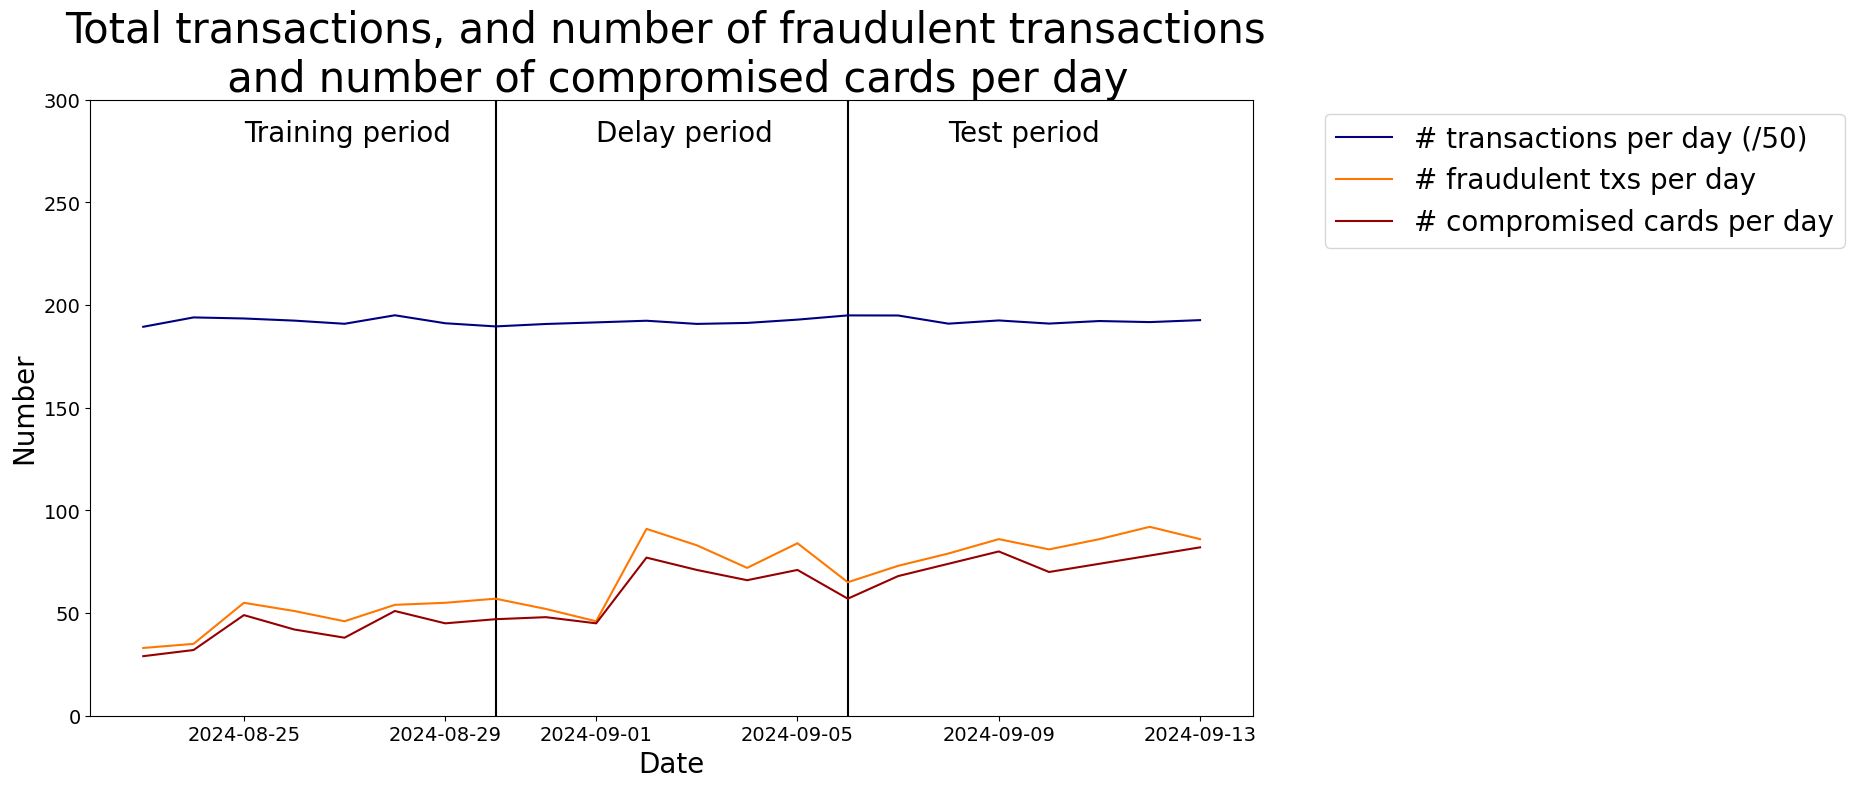

In [258]:

# Plot the number of transactions per day, fraudulent transactions per day and fraudulent cards per day
def get_template_tx_stats(ax ,fs,
                          start_date_training,
                          title='',
                          delta_train=7,
                          delta_delay=7,
                          delta_test=7,
                          ylim=300):
    
    ax.set_title(title, fontsize=fs*1.5)
    ax.set_ylim([0, ylim])
    
    ax.set_xlabel('Date', fontsize=fs)
    ax.set_ylabel('Number', fontsize=fs)
    
    plt.yticks(fontsize=fs*0.7) 
    plt.xticks(fontsize=fs*0.7)    

    ax.axvline(start_date_training+datetime.timedelta(days=delta_train), 0,ylim, color="black")
    ax.axvline(start_date_test, 0, ylim, color="black")
    
    ax.text(start_date_training+datetime.timedelta(days=2), ylim-20,'Training period', fontsize=fs)
    ax.text(start_date_training+datetime.timedelta(days=delta_train+2), ylim-20,'Delay period', fontsize=fs)
    ax.text(start_date_training+datetime.timedelta(days=delta_train+delta_delay+2), ylim-20,'Test period', fontsize=fs)


cmap = plt.get_cmap('jet')
colors={'nb_tx_per_day':cmap(0), 
        'nb_fraudulent_transactions_per_day':cmap(200), 
        'nb_compromised_cards_per_day':cmap(250)}

fraud_and_transactions_stats_fig, ax = plt.subplots(1, 1, figsize=(15,8))

# Training period
start_date_training = datetime.datetime.strptime("2024-08-23", "%Y-%m-%d")
delta_train = delta_delay = delta_test = 7
end_date_training = start_date_training+datetime.timedelta(days=delta_train-1)

# Test period
start_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay)
end_date_test = start_date_training+datetime.timedelta(days=delta_train+delta_delay+delta_test-1)
print(end_date_test)

get_template_tx_stats(ax, fs=20,
                      start_date_training = start_date_training,
                      title='Total transactions, and number of fraudulent transactions \n and number of compromised cards per day',
                      delta_train=delta_train,
                      delta_delay=delta_delay,
                      delta_test=delta_test
                     )

ax.plot(tx_stats['tx_date'], tx_stats['nb_tx_per_day']/50, 'b', color=colors['nb_tx_per_day'], label = '# transactions per day (/50)')
ax.plot(tx_stats['tx_date'], tx_stats['nb_fraudulent_transactions_per_day'], 'b', color=colors['nb_fraudulent_transactions_per_day'], label = '# fraudulent txs per day')
ax.plot(tx_stats['tx_date'], tx_stats['nb_compromised_cards_per_day'], 'b', color=colors['nb_compromised_cards_per_day'], label = '# compromised cards per day')

ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1),fontsize=20)

In [221]:
def get_train_test_set(transactions_df,
                       start_date_training,
                       delta_train=7,delta_delay=7,delta_test=7):
    
    # Get the training set data
    train_df = transactions_df[(transactions_df.TX_DATETIME>=start_date_training) &
                               (transactions_df.TX_DATETIME<=start_date_training+datetime.timedelta(days=delta_train))]
    
    # Get the test set data
    test_df = []
    
    # Note: Cards known to be compromised after the delay period are removed from the test set
    # That is, for each test day, all frauds known at (test_day-delay_period) are removed
    
    # First, get known defrauded customers from the training set
    known_defrauded_customers = set(train_df[train_df.TX_FRAUD==1].CUSTOMER_ID)
    
    # Get the relative starting day of training set (easier than TX_DATETIME to collect test data)
    start_tx_time_days_training = train_df.TX_TIME_DAYS.min()
    
    # Then, for each day of the test set
    for day in range(delta_test):
    
        # Get test data for that day
        test_df_day = transactions_df[transactions_df.TX_TIME_DAYS==start_tx_time_days_training+
                                                                    delta_train+delta_delay+
                                                                    day]
        
        # Compromised cards from that test day, minus the delay period, are added to the pool of known defrauded customers
        test_df_day_delay_period = transactions_df[transactions_df.TX_TIME_DAYS==start_tx_time_days_training+
                                                                                delta_train+
                                                                                day-1]
        
        new_defrauded_customers = set(test_df_day_delay_period[test_df_day_delay_period.TX_FRAUD==1].CUSTOMER_ID)
        known_defrauded_customers = known_defrauded_customers.union(new_defrauded_customers)
        
        test_df_day = test_df_day[~test_df_day.CUSTOMER_ID.isin(known_defrauded_customers)]
        
        test_df.append(test_df_day)
        
    test_df = pd.concat(test_df)
    
    # Sort data sets by ascending order of transaction ID
    train_df=train_df.sort_values('TRANSACTION_ID')
    test_df=test_df.sort_values('TRANSACTION_ID')
    
    return (train_df, test_df)

In [222]:
(train_df, test_df)=get_train_test_set(transactions_df,start_date_training,
                                       delta_train=7,delta_delay=7,delta_test=7)

Training set contains 67k txs among which 598 are fraudelent

In [223]:
train_df.shape

(67312, 23)

In [224]:
train_df['TX_FRAUD'].sum()

329

Test set contains 62k txs among which 434 are fraudelent

In [225]:
test_df.shape

(62358, 23)

In [226]:
test_df.TX_FRAUD.sum()

434

0.006 of the transactions are fraudelent

In [227]:
434 / 62358

0.0069598126944417716

BASELINE MODEL: DECISION TREES

In [228]:
output_feature="TX_FRAUD"

input_features=['TX_AMOUNT','TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 
                'CUSTOMER_ID_NB_TX1DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT1DAY_WINDOW',
       'CUSTOMER_ID_NB_TX7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT7DAY_WINDOW',
       'CUSTOMER_ID_NB_TX30DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT30DAY_WINDOW',
       'TERMINAL_ID_NB_TX_1DAY_WINDOW', 'TERMINAL_ID_RISK_1DAY_WINDOW',
       'TERMINAL_ID_NB_TX_7DAY_WINDOW', 'TERMINAL_ID_RISK_7DAY_WINDOW',
       'TERMINAL_ID_NB_TX_30DAY_WINDOW', 'TERMINAL_ID_RISK_30DAY_WINDOW']

In [229]:
from sklearn.preprocessing import StandardScaler
import time

def fit_model_and_get_predictions(classifier, train_df, test_df, 
                                  input_features, output_feature="TX_FRAUD",scale=True):
    if scale:
        # We first create a StandardScaler object
        scaler = StandardScaler()

        # We then fit the StandardScaler object on the training data
        scaler.fit(train_df[input_features])

        # We now scale the input features of the training and test data
        train_df.loc[:, input_features] = scaler.transform(train_df[input_features])
        test_df.loc[:, input_features] = scaler.transform(test_df[input_features])
    
    # We first train the classifier using the `fit` method, and pass as arguments the input and output features
    start_time=time.time()
    classifier.fit(train_df[input_features], train_df[output_feature])
    training_execution_time=time.time()-start_time

    # We then get the predictions on the training and test data using the `predict_proba` method
    # The predictions are returned as a numpy array, that provides the probability of fraud for each transaction 
    start_time=time.time()
    predictions_test=classifier.predict_proba(test_df[input_features])[:,1]
    prediction_execution_time=time.time()-start_time
    
    predictions_train=classifier.predict_proba(train_df[input_features])[:,1]

    # The result is returned as a dictionary containing the fitted models, 
    # and the predictions on the training and test sets
    model_and_predictions_dictionary = {'classifier': classifier,
                                        'predictions_test': predictions_test,
                                        'predictions_train': predictions_train,
                                        'training_execution_time': training_execution_time,
                                        'prediction_execution_time': prediction_execution_time
                                       }
    
    return model_and_predictions_dictionary

In [230]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=0, max_depth=2)
model_and_predictions_dictinoary = fit_model_and_get_predictions(classifier, train_df, test_df, 
                                                                 input_features, output_feature,
                                                                 scale = False)

In [231]:
test_df['TX_FRAUD_PREDICTED'] = model_and_predictions_dictinoary['predictions_test']
test_df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENERIO,TX_DURING_WEEKEND,...,CUSTOMER_ID_AVG_AMOUNT7DAY_WINDOW,CUSTOMER_ID_NB_TX30DAY_WINDOW,CUSTOMER_ID_AVG_AMOUNT30DAY_WINDOW,TERMINAL_ID_NB_TX_1DAY_WINDOW,TERMINAL_ID_RISK_1DAY_WINDOW,TERMINAL_ID_NB_TX_7DAY_WINDOW,TERMINAL_ID_RISK_7DAY_WINDOW,TERMINAL_ID_NB_TX_30DAY_WINDOW,TERMINAL_ID_RISK_30DAY_WINDOW,TX_FRAUD_PREDICTED
201258,201258,2024-09-06 00:06:08,4273,2372,35.74,1814768,14,0,0,0,...,69.221429,26.0,60.023462,0.0,0.0,5.0,0.0,10.0,0.0,0.002385
201259,201259,2024-09-06 00:06:26,2099,8883,8.20,1814786,14,0,0,0,...,10.251429,59.0,10.120000,0.0,0.0,7.0,0.0,14.0,0.0,0.002385
201260,201260,2024-09-06 00:06:32,1214,805,21.09,1814792,14,0,0,0,...,26.404167,37.0,24.219459,0.0,0.0,2.0,0.0,11.0,0.0,0.002385
201261,201261,2024-09-06 00:07:33,4889,7190,33.27,1814853,14,0,0,0,...,31.719167,28.0,27.306786,0.0,0.0,3.0,0.0,15.0,0.0,0.002385
201262,201262,2024-09-06 00:08:21,3128,7376,30.39,1814901,14,0,0,0,...,23.000000,39.0,26.547179,1.0,0.0,10.0,0.0,20.0,0.0,0.002385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268664,268664,2024-09-12 23:59:06,171,5435,76.14,2419146,20,0,0,0,...,67.278182,66.0,72.184848,0.0,0.0,4.0,0.0,30.0,0.0,0.002385
268665,268665,2024-09-12 23:59:08,2705,5898,5.52,2419148,20,0,0,0,...,32.256667,5.0,48.074000,3.0,0.0,8.0,0.0,18.0,0.0,0.002385
268666,268666,2024-09-12 23:59:12,218,424,27.18,2419152,20,0,0,0,...,37.715333,48.0,37.876042,2.0,0.0,12.0,0.0,25.0,0.0,0.002385
268667,268667,2024-09-12 23:59:27,3426,8364,5.27,2419167,20,0,0,0,...,6.473500,85.0,7.033059,3.0,0.0,12.0,0.0,31.0,0.0,0.002385


[Text(0.6, 0.8333333333333334, 'TX_AMOUNT <= 219.86\ngini = 0.01\nsamples = 67312\nvalue = [66983, 329]'),
 Text(0.4, 0.5, 'TERMINAL_ID_RISK_30DAY_WINDOW <= 0.268\ngini = 0.006\nsamples = 67184\nvalue = [66983, 201]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.005\nsamples = 67092\nvalue = [66932, 160]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.494\nsamples = 92\nvalue = [51, 41]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 128\nvalue = [0, 128]'),
 Text(0.7, 0.6666666666666667, '  False')]

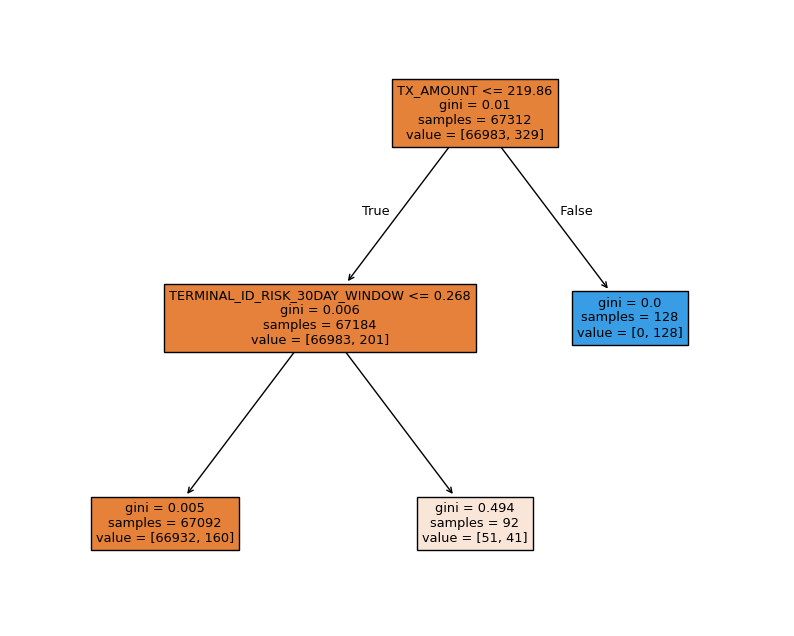

In [232]:
#Display the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(10,8))
plot_tree(model_and_predictions_dictinoary['classifier'], 
          feature_names = input_features,
          filled=True)

In [233]:
#Metrics


In [234]:
from sklearn.metrics import roc_auc_score, average_precision_score

def card_precision_top_k_day(df_day,top_k):
    
    # This takes the max of the predictions AND the max of label TX_FRAUD for each CUSTOMER_ID, 
    # and sorts by decreasing order of fraudulent prediction
    df_day = df_day.groupby('CUSTOMER_ID').max().sort_values(by="predictions", ascending=False).reset_index(drop=False)
            
    # Get the top k most suspicious cards
    df_day_top_k=df_day.head(top_k)
    list_detected_compromised_cards=list(df_day_top_k[df_day_top_k.TX_FRAUD==1].CUSTOMER_ID)
    
    # Compute precision top k
    card_precision_top_k = len(list_detected_compromised_cards) / top_k
    
    return list_detected_compromised_cards, card_precision_top_k

def card_precision_top_k(predictions_df, top_k, remove_detected_compromised_cards=True):

    # Sort days by increasing order
    list_days=list(predictions_df['TX_TIME_DAYS'].unique())
    list_days.sort()
    
    # At first, the list of detected compromised cards is empty
    list_detected_compromised_cards = []
    
    card_precision_top_k_per_day_list = []
    nb_compromised_cards_per_day = []
    
    # For each day, compute precision top k
    for day in list_days:
        
        df_day = predictions_df[predictions_df['TX_TIME_DAYS']==day]
        df_day = df_day[['predictions', 'CUSTOMER_ID', 'TX_FRAUD']]
        
        # Let us remove detected compromised cards from the set of daily transactions
        df_day = df_day[df_day.CUSTOMER_ID.isin(list_detected_compromised_cards)==False]
        
        nb_compromised_cards_per_day.append(len(df_day[df_day.TX_FRAUD==1].CUSTOMER_ID.unique()))
        
        detected_compromised_cards, card_precision_top_k = card_precision_top_k_day(df_day,top_k)
        
        card_precision_top_k_per_day_list.append(card_precision_top_k)
        
        # Let us update the list of detected compromised cards
        if remove_detected_compromised_cards:
            list_detected_compromised_cards.extend(detected_compromised_cards)
        
    # Compute the mean
    mean_card_precision_top_k = np.array(card_precision_top_k_per_day_list).mean()
    
    # Returns precision top k per day as a list, and resulting mean
    return nb_compromised_cards_per_day,card_precision_top_k_per_day_list,mean_card_precision_top_k

def performance_assessment(predictions_df, output_feature='TX_FRAUD', 
                           prediction_feature='predictions', top_k_list=[100],
                           rounded=True):
    
    AUC_ROC = roc_auc_score(predictions_df[output_feature], predictions_df[prediction_feature])
    AP = average_precision_score(predictions_df[output_feature], predictions_df[prediction_feature])
    
    performances = pd.DataFrame([[AUC_ROC, AP]], 
                           columns=['AUC ROC','Average precision'])
    
    for top_k in top_k_list:
    
        _, _, mean_card_precision_top_k = card_precision_top_k(predictions_df, top_k)
        performances['Card Precision@'+str(top_k)]=mean_card_precision_top_k
        
    if rounded:
        performances = performances.round(3)
    
    return performances

In [235]:
predictions_df=test_df
predictions_df['predictions']=  model_and_predictions_dictinoary['predictions_test']
   
performance_assessment(predictions_df, top_k_list=[100])

,AUC ROC,Average precision,Card Precision@100
0,0.743,0.486,0.223


-Card Precision@100, which tells us that every day, 24% of the cards with the highest fraudulent scores were indeed compromised. Since the percentage of frauds in the test set is 0.7%, this proportion of detected frauds is high and means that the classifier indeed manages to do much better than chance.


In [236]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
import xgboost

classifiers_dictionary={'Logistic regression':sklearn.linear_model.LogisticRegression(random_state=1), 
                        'Decision tree with depth of two':sklearn.tree.DecisionTreeClassifier(max_depth=2,random_state=1), 
                        'Decision tree - unlimited depth':sklearn.tree.DecisionTreeClassifier(random_state=1), 
                        'Random forest':sklearn.ensemble.RandomForestClassifier(random_state=1,n_jobs=-1),
                        'XGBoost':xgboost.XGBClassifier(random_state=1, n_jobs=-1)
                       }

In [237]:
fitted_models_and_predictions_dictionary={}

for classifier_name in classifiers_dictionary:

    model_and_predictions = fit_model_and_get_predictions(classifiers_dictionary[classifier_name], train_df, test_df, 
                                                                                  input_features=input_features,
                                                                                output_feature=output_feature)
    fitted_models_and_predictions_dictionary[classifier_name] = model_and_predictions


/var/folders/5c/rt3br2gn32703lgpxpmkc82c0000gn/T/ipykernel_21504/2982931361.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.40963415 -0.40963415 -0.40963415 ... -0.40963415 -0.40963415
 -0.40963415]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.loc[:, input_features] = scaler.transform(train_df[input_features])
/var/folders/5c/rt3br2gn32703lgpxpmkc82c0000gn/T/ipykernel_21504/2982931361.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 2.19724345  2.19724345  2.19724345 ... -0.4551157  -0.4551157
 -0.4551157 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.loc[:, input_features] = scaler.transform(train_df[input_features])
/var/folders/5c/rt3br2gn32703lgpxpmkc82c0000gn/T/ipykernel_21504/2982931361.py:15: FutureWarning: Setting a

In [238]:
def performance_assessment_model_collection(fitted_models_and_predictions_dictionary, 
                                            transactions_df, 
                                            type_set='test',
                                            top_k_list=[100]):

    performances=pd.DataFrame() 
   
    for classifier_name, model_and_predictions in fitted_models_and_predictions_dictionary.items():
    
        predictions_df = transactions_df
            
        predictions_df['predictions'] = model_and_predictions['predictions_'+type_set]
        
        performances_model = performance_assessment(predictions_df, output_feature='TX_FRAUD', 
                                                   prediction_feature='predictions', top_k_list=top_k_list)
        performances_model.index=[classifier_name]
        
        performances=pd.concat([performances, performances_model])
        
    return performances

In [239]:
# performances on test set
df_performances=performance_assessment_model_collection(fitted_models_and_predictions_dictionary, test_df, 
                                                        type_set='test', 
                                                        top_k_list=[100])
df_performances

,AUC ROC,Average precision,Card Precision@100
Logistic regression,0.848,0.554,0.260
Decision tree with depth of two,0.743,0.486,0.223
Decision tree - unlimited depth,0.768,0.195,0.246
Random forest,0.848,0.627,0.300
XGBoost,0.834,0.561,0.273


In [240]:
# performances on training set
df_performances = performance_assessment_model_collection(fitted_models_and_predictions_dictionary, train_df,
                                                        type_set='train', 
                                                        top_k_list=[100])
df_performances

,AUC ROC,Average precision,Card Precision@100
Logistic regression,0.831,0.474,0.156
Decision tree with depth of two,0.757,0.487,0.156
Decision tree - unlimited depth,1.000,1.000,0.290
Random forest,1.000,1.000,0.290
XGBoost,1.000,0.956,0.286


- All prediction models have learned useful fraud patterns from the training data. This can be seen from the AUC ROC on the test set, which is higher than 0.5 for all classifiers, and an average precision much higher than 0.007.

- The random forest and boosting models provide better performances (in terms of Average Precision) than logistic regression and decision trees. This is also widely reported in the fraud detection literature.

- The relative performances of the classifiers differ depending on which performance metrics is used. For example, a decision tree of depth 2 has a lower AUC ROC than a decision tree of unlimited depth, but a higher average precision. Understanding precisely what these performances mean is crucial, and will be addressed in the next chapter.

- The performance of some classifiers (Random Forest and Decision Tree with unlimited depth) is perfect on the training set (AUC ROC and Average Precision of 1), but lower on the test set. In fact, the decision tree with unlimited depth is actually the worst classifier on the test set in terms of Average Precision. This is an example of a phenomenon called overfitting, which should be avoided. 

- As expected, the execution times for training ensembles of models (Random forest and XGBoost) is significantly higher than single models (decision trees and logistic regression).

VALIDATION STRATEGIES



In [241]:
start_date_training = datetime.datetime.strptime("2024-08-23", "%Y-%m-%d")
delta_train = delta_delay = delta_test = 7

In [242]:
def get_performances_train_test_sets(transactions_df, classifier,
                                     input_features, output_feature,
                                     start_date_training, 
                                     delta_train=7, delta_delay=7, delta_test=7,
                                     top_k_list=[100],
                                     type_test="Test", parameter_summary=""):

    # Get the training and test sets
    (train_df, test_df)=get_train_test_set(transactions_df,start_date_training,
                                           delta_train=delta_train,
                                           delta_delay=delta_delay,
                                           delta_test=delta_test)
    
    # Fit model
    start_time=time.time() 
    model_and_predictions_dictionary = fit_model_and_get_predictions(classifier, train_df, test_df, 
                                                                     input_features, output_feature)
    execution_time=time.time()-start_time
    
    # Compute fraud detection performances
    test_df['predictions']=model_and_predictions_dictionary['predictions_test']
    performances_df_test=performance_assessment(test_df, top_k_list=top_k_list)
    performances_df_test.columns=performances_df_test.columns.values+' '+type_test
    
    train_df['predictions']=model_and_predictions_dictionary['predictions_train']
    performances_df_train=performance_assessment(train_df, top_k_list=top_k_list)
    performances_df_train.columns=performances_df_train.columns.values+' Train'
    
    performances_df=pd.concat([performances_df_test,performances_df_train],axis=1)
    
    performances_df['Execution time']=execution_time
    performances_df['Parameters summary']=parameter_summary
    
    return performances_df

Let us for example compute the test and training accuracies using a decision tree with depth 2.

In [243]:
classifier = sklearn.tree.DecisionTreeClassifier(max_depth=2, random_state=0)

performances_df=get_performances_train_test_sets(transactions_df, classifier, 
                                                 input_features, output_feature,
                                                 start_date_training=start_date_training, 
                                                 delta_train=delta_train, 
                                                 delta_delay=delta_delay, 
                                                 delta_test=delta_test,
                                                 parameter_summary=2
                                                )

/var/folders/5c/rt3br2gn32703lgpxpmkc82c0000gn/T/ipykernel_21504/2982931361.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.40963415 -0.40963415 -0.40963415 ... -0.40963415 -0.40963415
 -0.40963415]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.loc[:, input_features] = scaler.transform(train_df[input_features])
/var/folders/5c/rt3br2gn32703lgpxpmkc82c0000gn/T/ipykernel_21504/2982931361.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 2.19724345  2.19724345  2.19724345 ... -0.4551157  -0.4551157
 -0.4551157 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.loc[:, input_features] = scaler.transform(train_df[input_features])
/var/folders/5c/rt3br2gn32703lgpxpmkc82c0000gn/T/ipykernel_21504/2982931361.py:15: FutureWarning: Setting a

In [244]:
performances_df

,AUC ROC Test,Average precision Test,Card Precision@100 Test,AUC ROC Train,Average precision Train,Card Precision@100 Train,Execution time,Parameters summary
0,0.743,0.486,0.223,0.757,0.487,0.156,0.097192,2


In [245]:
list_parameters = [2,3,4,5,6,7,8,9,10,20,50]
performances_df = pd.DataFrame()

for max_depth in list_parameters:
    classifier = sklearn.tree.DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    performances_df = pd.concat([performances_df, get_performances_train_test_sets(transactions_df, classifier, input_features, output_feature, start_date_training, delta_train,delta_delay, delta_test, parameter_summary=max_depth)])


/var/folders/5c/rt3br2gn32703lgpxpmkc82c0000gn/T/ipykernel_21504/2982931361.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.40963415 -0.40963415 -0.40963415 ... -0.40963415 -0.40963415
 -0.40963415]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.loc[:, input_features] = scaler.transform(train_df[input_features])
/var/folders/5c/rt3br2gn32703lgpxpmkc82c0000gn/T/ipykernel_21504/2982931361.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 2.19724345  2.19724345  2.19724345 ... -0.4551157  -0.4551157
 -0.4551157 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.loc[:, input_features] = scaler.transform(train_df[input_features])
/var/folders/5c/rt3br2gn32703lgpxpmkc82c0000gn/T/ipykernel_21504/2982931361.py:15: FutureWarning: Setting a

In [246]:
performances_df

,AUC ROC Test,Average precision Test,Card Precision@100 Test,AUC ROC Train,Average precision Train,Card Precision@100 Train,Execution time,Parameters summary
0,0.743,0.486,0.223,0.757,0.487,0.156,0.096518,2
0,0.743,0.486,0.223,0.760,0.505,0.156,0.128871,3
0,0.768,0.533,0.263,0.764,0.517,0.161,0.158608,4
0,0.771,0.482,0.261,0.770,0.533,0.160,0.192297,5
0,0.769,0.414,0.261,0.780,0.546,0.159,0.224731,6
0,0.716,0.438,0.229,0.821,0.558,0.159,0.264953,7
0,0.781,0.434,0.261,0.825,0.593,0.169,0.295451,8
0,0.752,0.368,0.247,0.828,0.607,0.170,0.326792,9
0,0.688,0.350,0.214,0.842,0.617,0.171,0.356008,10
0,0.669,0.014,0.034,0.982,0.845,0.237,0.622919,20


In [247]:
# Get the performance plot for a single performance metric
def get_performance_plot(performances_df, 
                         ax, 
                         performance_metric, 
                         expe_type_list=['Test','Train'], 
                         expe_type_color_list=['#008000','#2F4D7E'],
                         parameter_name="Tree maximum depth",
                         summary_performances=None):
    
    # expe_type_list is the list of type of experiments, typically containing 'Test', 'Train', or 'Valid'
    # For all types of experiments
    for i in range(len(expe_type_list)):
    
        # Column in performances_df for which to retrieve the data 
        performance_metric_expe_type=performance_metric+' '+expe_type_list[i]
    
        # Plot data on graph
        ax.plot(performances_df['Parameters summary'], performances_df[performance_metric_expe_type], 
                color=expe_type_color_list[i], label = expe_type_list[i])
        
        # If performances_df contains confidence intervals, add them to the graph
        if performance_metric_expe_type+' Std' in performances_df.columns:
        
            conf_min = performances_df[performance_metric_expe_type]\
                        -2*performances_df[performance_metric_expe_type+' Std']
            conf_max = performances_df[performance_metric_expe_type]\
                        +2*performances_df[performance_metric_expe_type+' Std']
    
            ax.fill_between(performances_df['Parameters summary'], conf_min, conf_max, color=expe_type_color_list[i], alpha=.1)

    # If summary_performances table is present, adds vertical dashed bar for best estimated parameter 
    if summary_performances is not None:
        best_estimated_parameter=summary_performances[performance_metric][['Best estimated parameters ($k^*$)']].values[0]
        best_estimated_performance=float(summary_performances[performance_metric][['Validation performance']].values[0].split("+/-")[0])
        ymin, ymax = ax.get_ylim()
        ax.vlines(best_estimated_parameter, ymin, best_estimated_performance,
                  linestyles="dashed")
    
    # Set title, and x and y axes labels
    ax.set_title(performance_metric+'\n', fontsize=14)
    ax.set(xlabel = parameter_name, ylabel=performance_metric)

# Get the performance plots for a set of performance metric
def get_performances_plots(performances_df, 
                           performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                           expe_type_list=['Test','Train'], expe_type_color_list=['#008000','#2F4D7E'],
                           parameter_name="Tree maximum depth",
                           summary_performances=None):
    
    # Create as many graphs as there are performance metrics to display
    n_performance_metrics = len(performance_metrics_list)
    fig, ax = plt.subplots(1, n_performance_metrics, figsize=(5*n_performance_metrics,4))
    
    # Plot performance metric for each metric in performance_metrics_list
    for i in range(n_performance_metrics):
    
        get_performance_plot(performances_df, ax[i], performance_metric=performance_metrics_list[i], 
                             expe_type_list=expe_type_list, 
                             expe_type_color_list=expe_type_color_list,
                             parameter_name=parameter_name,
                             summary_performances=summary_performances)
    
    ax[n_performance_metrics-1].legend(loc='upper left', 
                                       labels=expe_type_list, 
                                       bbox_to_anchor=(1.05, 1),
                                       title="Type set")

    plt.subplots_adjust(wspace=0.5, 
                        hspace=0.8)

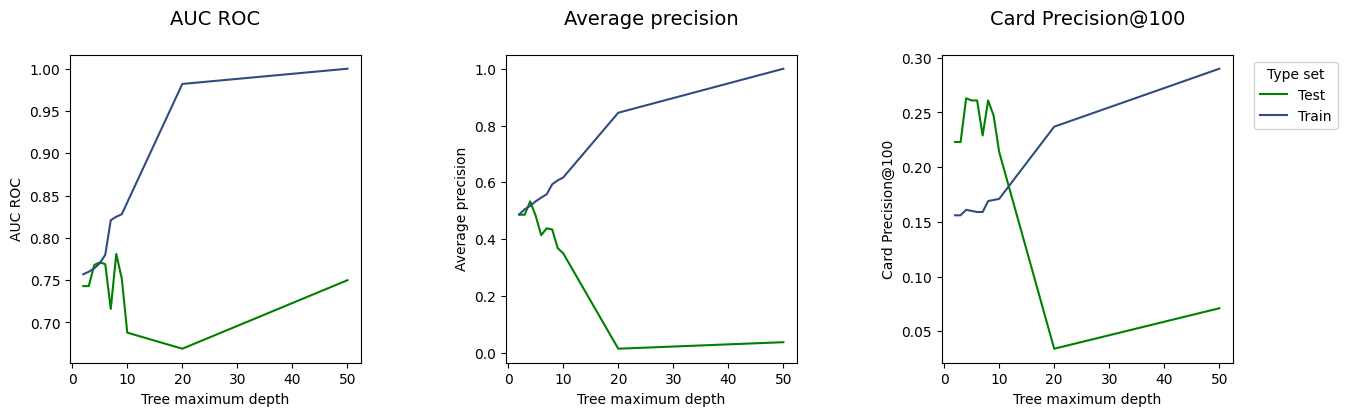

In [248]:
get_performances_plots(performances_df, 
                       performance_metrics_list=['AUC ROC', 'Average precision', 'Card Precision@100'], 
                       expe_type_list=['Test','Train'],expe_type_color_list=['#008000','#2F4D7E'])

HOLD-OUT-VALIDATION


In [249]:
classifier = sklearn.tree.DecisionTreeClassifier(max_depth = 2, random_state=0)

delta_valid = delta_test

start_date_training_with_valid = start_date_training+datetime.timedelta(days=-(delta_delay+delta_valid))

performances_df_validation=get_performances_train_test_sets(transactions_df, 
                                                            classifier, 
                                                            input_features, output_feature,
                                                            start_date_training=start_date_training_with_valid, 
                                                            delta_train=delta_train, 
                                                            delta_delay=delta_delay, 
                                                            delta_test=delta_test,
                                                            type_test='Validation', parameter_summary='2')

ValueError: Found array with 0 sample(s) (shape=(0, 15)) while a minimum of 1 is required by StandardScaler.